# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


In [3]:
# cities

['ribeira grande',
 'port-aux-francais',
 'waitangi',
 'renk',
 'ilulissat',
 'tsiombe',
 'adamstown',
 'suva',
 'namtsy',
 'thompson',
 'nadym',
 'tobi village',
 'smithers',
 'trakai',
 'bethel',
 'blackmans bay',
 'hithadhoo',
 'lihue',
 'queenstown',
 'constantia',
 'isafjordur',
 'pimentel',
 'longyearbyen',
 'iqaluit',
 'bilibino',
 'aasiaat',
 'cable beach',
 'yellowknife',
 'nuuk',
 'puerto ayora',
 'dunedin',
 'college',
 'faranah',
 'miastko',
 'fuvahmulah',
 'lebu',
 'villa bruzual',
 'pemangkat',
 'jamestown',
 'carmen de apicala',
 'west island',
 'green river',
 'edinburgh of the seven seas',
 'funafuti',
 'ad dawadimi',
 'aldinga beach',
 'grytviken',
 'bredasdorp',
 'tiksi',
 'vredenburg',
 'new norfolk',
 'sitka',
 'nemuro',
 'udachny',
 'puerto san carlos',
 'altay',
 'puerto natales',
 'codrington',
 'sambava',
 'hawaiian paradise park',
 'sur',
 'olonkinbyen',
 'lodja',
 'ancud',
 'kodiak',
 'tidjikja',
 'taiohae',
 'midvagur',
 'hermanus',
 'heihe',
 'port lincoln'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# # Testing Small Subset of Information to make sure all the correct data is being pulled 

# city = "London"

# city_url = "https://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + weather_api_key  

# city_weather = requests.get(city_url).json()

# city_data = []      

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
# city_lat = city_weather["coord"]["lat"]
# city_lng = city_weather["coord"]["lon"]
# city_max_temp = city_weather["main"]["temp_max"]
# city_humidity = city_weather["main"]["humidity"]
# city_clouds = city_weather["clouds"]["all"]
# city_wind = city_weather["wind"]["speed"]
# city_country = city_weather["sys"]["country"]
# city_date = city_weather["dt"]

#         # Append the City information into city_data list
# city_data.append({"City": city, 
#                           "Lat": city_lat, 
#                           "Lng": city_lng, 
#                           "Max Temp": (city_max_temp - 273.15),
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})

#     # If an error is experienced, skip the city
#     # except:
#     #     print("City not found. Skipping...")
#     #     pass
# df = pd.DataFrame(city_data)
# df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,London,51.5085,-0.1257,12.08,92,75,5.66,GB,1698580205


In [9]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "https://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
      

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": (city_max_temp - 273.15),
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | renk
City not found. Skipping...
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | tsiombe
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | suva
Processing Record 9 of Set 1 | namtsy
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | nadym
Processing Record 12 of Set 1 | tobi village
City not found. Skipping...
Processing Record 13 of Set 1 | smithers
Processing Record 14 of Set 1 | trakai
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | lihue
Processing Record 19 of Set 1 | queenstown
Processing Record 20 of Set 1 | constantia
Processing Record 21 of Set 1 | isafjordur
Processing Record 22

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,19.22,55,40,5.81,PT,1698580829
1,port-aux-francais,-49.3500,70.2167,5.05,99,100,10.91,TF,1698580831
2,waitangi,-43.9535,-176.5597,10.22,77,25,2.27,NZ,1698580832
3,ilulissat,69.2167,-51.1000,-8.99,73,75,1.03,GL,1698580833
4,tsiombe,-25.3000,45.4833,32.85,43,0,6.72,MG,1698580834


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,19.22,55,40,5.81,PT,1698580829
1,port-aux-francais,-49.3500,70.2167,5.05,99,100,10.91,TF,1698580831
2,waitangi,-43.9535,-176.5597,10.22,77,25,2.27,NZ,1698580832
3,ilulissat,69.2167,-51.1000,-8.99,73,75,1.03,GL,1698580833
4,tsiombe,-25.3000,45.4833,32.85,43,0,6.72,MG,1698580834


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

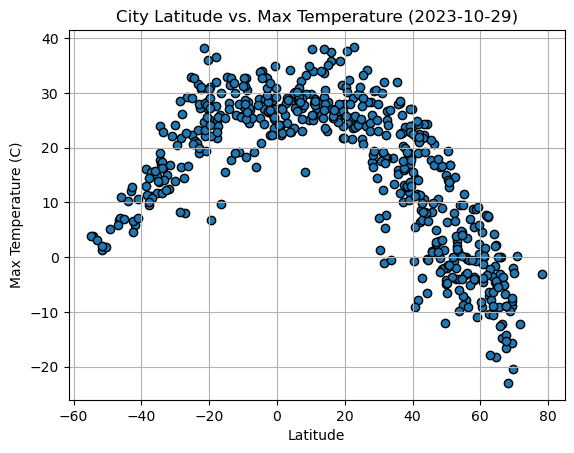

In [18]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Latitude vs. Max Temperature (2023-10-29)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

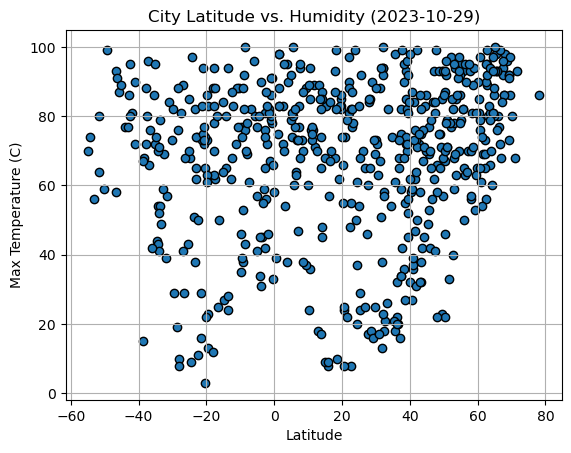

In [44]:
# Build the scatter plots for latitude vs. humidity

x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, marker='o', edgecolors="black")


# Incorporate the other graph properties

plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Latitude vs. Humidity (2023-10-29)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

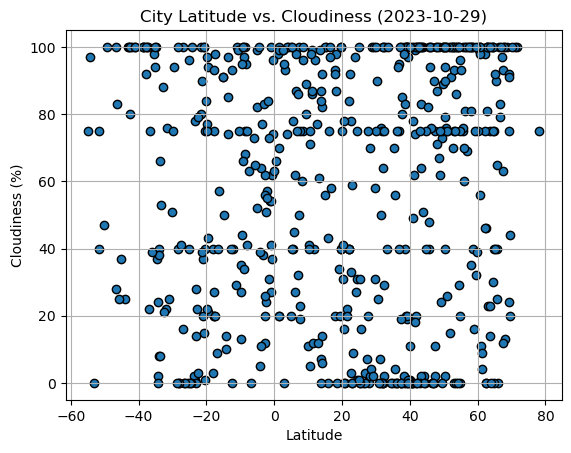

In [22]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (2023-10-29)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

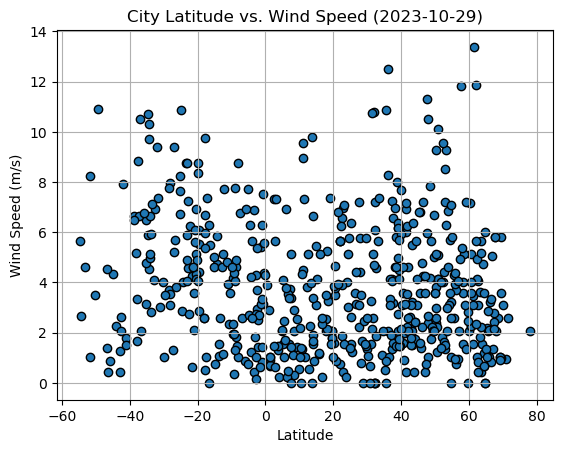

In [23]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed (2023-10-29)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


In [25]:
regress_values = x_values * slope + intercept
regress_values

City_ID
0      3.528296
1      4.571804
2      4.507715
3      3.163702
4      4.286185
         ...   
565    3.684512
566    3.277405
567    4.598793
568    3.554783
569    3.220119
Name: Lat, Length: 570, dtype: float64

In [26]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.drop(city_data_df[city_data_df["Lat"] <= 0].index)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,19.22,55,40,5.81,PT,1698580829
3,ilulissat,69.2167,-51.1000,-8.99,73,75,1.03,GL,1698580833
7,namtsy,62.7161,129.6658,-7.09,89,100,4.05,RU,1698580581
8,thompson,55.7435,-97.8558,-7.91,93,75,2.57,CA,1698580582
9,nadym,65.5333,72.5167,-9.16,98,90,2.20,RU,1698580582


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.drop(city_data_df[city_data_df["Lat"] > 0].index)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,5.05,99,100,10.91,TF,1698580831
2,waitangi,-43.9535,-176.5597,10.22,77,25,2.27,NZ,1698580832
4,tsiombe,-25.3000,45.4833,32.85,43,0,6.72,MG,1698580834
5,adamstown,-25.0660,-130.1015,22.24,85,96,7.63,PN,1698580835
6,suva,-18.1416,178.4415,24.71,88,40,2.57,FJ,1698580786


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8527292007342143


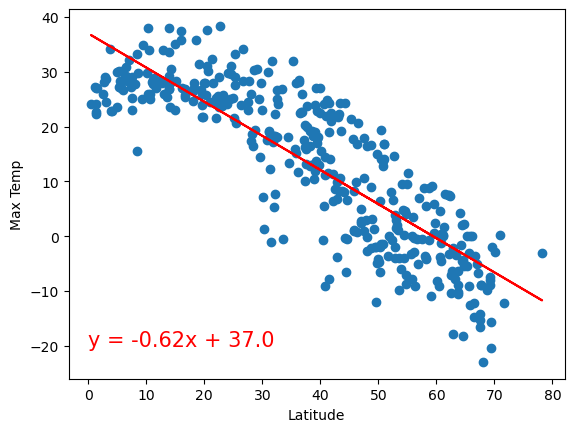

In [30]:
##Adjust temp from Kelvin to C

# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")

#print r value
print(f'The r-value is: {rvalue}')

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show()

The r-value is: 0.7648354163722828


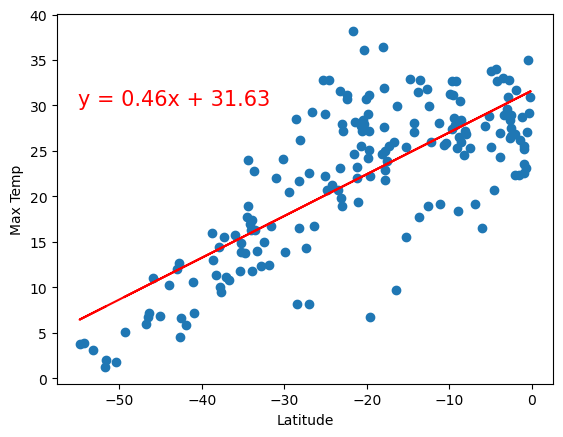

In [33]:
##Adjust Temp from Kelvin to C

# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

#print r value
print(f'The r-value is: {rvalue}')

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Linear Relationship Discussion: 
# The closer you are to Latitude 0, the higher the max temperature. This coincides with temperatures being greater as you
#get closer to the equator. It does not matter if you're in the southern or northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.19959401916307828


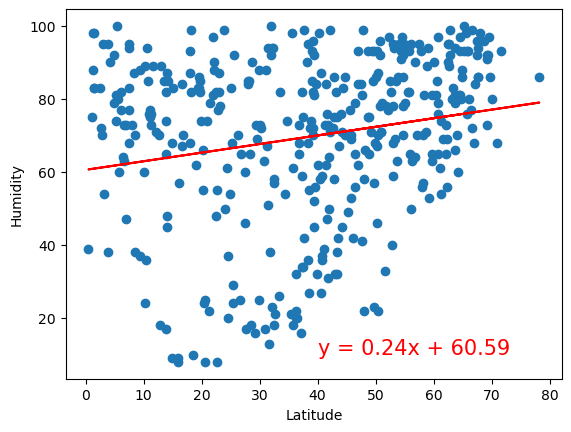

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

#print r value
print(f'The r-value is: {rvalue}')


plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: -0.04191893333446961


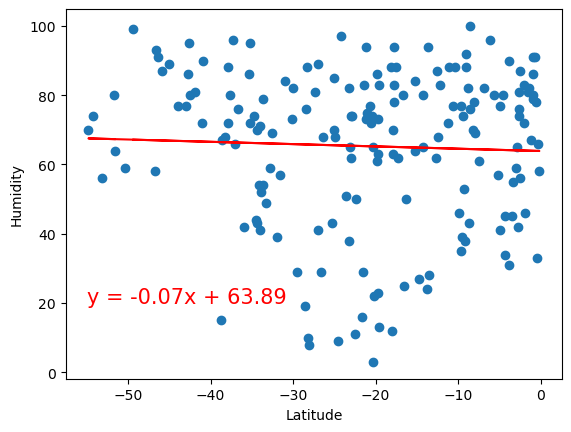

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

#print r value
print(f'The r-value is: {rvalue}')

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Linear Relationship Discussion: 
#There doesnt look to be a linear relationship between latitude & humidity for either the Southern or Northern Hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10464594752722253


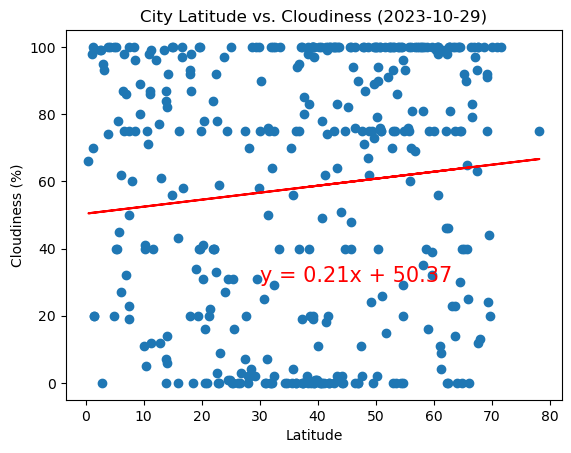

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,30),fontsize=15,color="red")

#print r value
print(f'The r-value is: {rvalue}')

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (2023-10-29)")
plt.show()

The r-value is: -0.06421304935521732


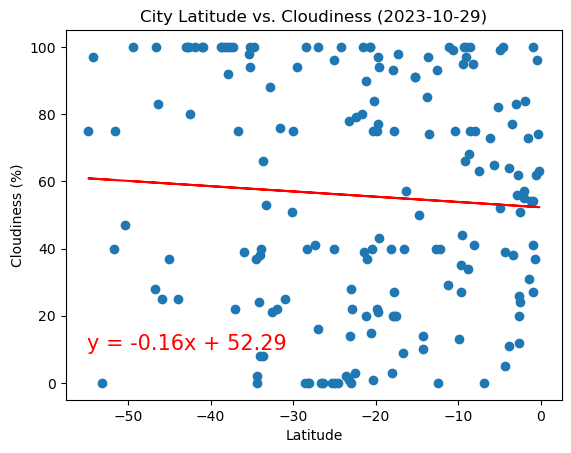

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")

#print r value
print(f'The r-value is: {rvalue}')

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (2023-10-29)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Linear Relationship Discussion: 
#There doesnt look to be a linear relationship between latitude & Cloudiness for either the Southern or Northern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07427677798807152


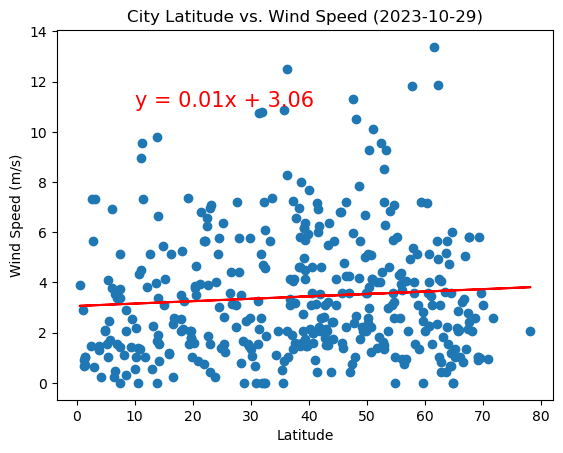

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,11),fontsize=15,color="red")

#print r value
print(f'The r-value is: {rvalue}')

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed (2023-10-29)")
plt.show()

The r-value is: -0.18097361216603997


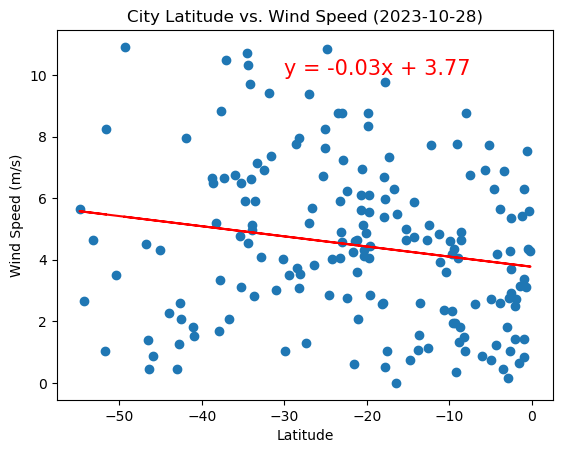

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed (2023-10-28)")
print(f'The r-value is: {rvalue}')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Linear Relationship Discussion: 
#There doesnt look to be a linear relationship between latitude & Windspeed for either the Southern or Northern Hemisphere. 